In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
india_daily = pd.read_csv('data/Wheat Futures India Daily (2015-22).csv',index_col=0)
india_weekly = pd.read_csv('data/Wheat Futures India Weekly (2012-22).csv',index_col=0)
india_monthly = pd.read_csv('data/Wheat Futures India Monthly (2007-22).csv',index_col=0)

In [3]:
india_daily = india_daily.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)
india_weekly = india_weekly.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)
india_monthly = india_monthly.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)

In [4]:
india_daily = india_daily[::-1]
india_weekly = india_weekly[::-1]
india_monthly = india_monthly[::-1]

dly_chng = [0]*len(india_daily.Price.values)
weekly_chng = [0]*len(india_weekly.Price.values)
monthly_chng = [0]*len(india_monthly.Price.values)

for i in range(1, len(india_daily.Price.values)):
    dly_chng[i] = round((india_daily.Price.values[i] - india_daily.Price.values[i-1])/india_daily.Price.values[i-1] * 100, 2)

for i in range(1, len(india_weekly.Price.values)):
    weekly_chng[i] = round((india_weekly.Price.values[i] - india_weekly.Price.values[i-1])/india_weekly.Price.values[i-1] * 100, 2)

for i in range(1, len(india_monthly.Price.values)):
    monthly_chng[i] = round((india_monthly.Price.values[i] - india_monthly.Price.values[i-1])/india_monthly.Price.values[i-1] * 100, 2)

In [5]:
india_daily['Daily Change (%)'] = dly_chng
india_weekly['Weekly Change (%)'] = weekly_chng
india_monthly['Monthly Change (%)'] = monthly_chng

india_daily['Daily Change (%) Squared'] = np.square(india_daily['Daily Change (%)'].values)
india_weekly['Weekly Change (%) Squared'] = np.square(india_weekly['Weekly Change (%)'].values)
india_monthly['Monthly Change (%) Squared'] = np.square(india_monthly['Monthly Change (%)'].values)

In [6]:
india_daily.drop('20-05-2015', inplace=True)
india_weekly.drop('08-04-2012', inplace=True)
india_monthly.drop('01-06-2007', inplace=True)

india_daily.drop(columns=['Change %'], inplace=True)
india_weekly.drop(columns=['Change %'], inplace=True)
india_monthly.drop(columns=['Change %'], inplace=True)

In [7]:
up_wthr = pd.read_csv('./Indian States Weather Data/uttar_pradesh.csv').rename(columns = {'date':'up_date', 'temperature':'up_temp', 'precipitation':'up_prec'})
mp_wthr = pd.read_csv('./Indian States Weather Data/madhya_pradesh.csv').rename(columns = {'date':'mp_date', 'temperature':'mp_temp', 'precipitation':'mp_prec'})
pj_wthr = pd.read_csv('./Indian States Weather Data/punjab.csv').rename(columns = {'date':'pj_date', 'temperature':'pj_temp', 'precipitation':'pj_prec'})

In [15]:
up_wthr.up_date = ['-'.join(i.split('-')[::-1]) for i in up_wthr.up_date]
mp_wthr.mp_date = ['-'.join(i.split('-')[::-1]) for i in mp_wthr.mp_date]
pj_wthr.pj_date = ['-'.join(i.split('-')[::-1]) for i in pj_wthr.pj_date]

In [18]:
daily_data_dates = np.array([i for i in india_daily.index.values if i in up_wthr.up_date.values])
print("Daily Data Size:", len(daily_data_dates))
weekly_data_dates = np.array([i for i in india_weekly.index.values if i in up_wthr.up_date.values])
print("Weekly Data Size:", len(weekly_data_dates))
monthly_data_dates = np.array([i for i in india_monthly.index.values if i in up_wthr.up_date.values])
print("Monthly Data Size:", len(monthly_data_dates))

Daily Data Size: 1628
Weekly Data Size: 513
Monthly Data Size: 148


In [19]:
india_daily_new = india_daily.loc[daily_data_dates].reset_index().rename(columns = {"Date":'date'}).drop(columns = ['Open','High','Low','Vol.'])
india_weekly_new = india_weekly.loc[weekly_data_dates].reset_index().rename(columns = {"Date":'date'}).drop(columns = ['Open','High','Low','Vol.'])
india_monthly_new = india_monthly.loc[monthly_data_dates].reset_index().rename(columns = {"Date":'date'}).drop(columns = ['Open','High','Low','Vol.'])

In [20]:
DAILY = pd.concat([india_daily_new, up_wthr, mp_wthr, pj_wthr], join='inner', axis = 1).drop(columns = ['up_date','mp_date','pj_date'])
WEEKLY = pd.concat([india_weekly_new, up_wthr, mp_wthr, pj_wthr], join='inner', axis = 1).drop(columns = ['up_date','mp_date','pj_date'])
MONTHLY = pd.concat([india_monthly_new, up_wthr, mp_wthr, pj_wthr], join='inner', axis = 1).drop(columns = ['up_date','mp_date','pj_date'])

In [21]:
DAILY.date = [datetime.strptime(i, "%d-%m-%Y") for i in DAILY.date]
WEEKLY.date = [datetime.strptime(i, "%d-%m-%Y") for i in WEEKLY.date]
MONTHLY.date = [datetime.strptime(i, "%d-%m-%Y") for i in MONTHLY.date]

In [22]:
DAILY.drop(columns='date').describe().drop('count')

,Price,Daily Change (%),Daily Change (%) Squared,up_temp,up_prec,mp_temp,mp_prec,pj_temp,pj_prec
mean,1823.597052,0.035424,1.202306,24.416673,0.108813,25.230373,0.128591,23.341160,0.080671
std,193.233387,1.096262,5.374967,6.617744,0.242392,5.679234,0.324198,7.576231,0.194285
min,1449.000000,-9.190000,0.000000,9.139657,0.000000,12.181938,0.000000,6.564702,0.000000
25%,1665.000000,-0.300000,0.004900,18.211069,0.000000,20.925688,0.000000,16.220208,0.000000
50%,1793.000000,0.000000,0.102400,26.331440,0.003241,25.365531,0.000000,25.455178,0.002381
75%,1980.000000,0.350000,0.581425,28.992030,0.090278,28.885453,0.054427,29.230625,0.055952
max,2373.000000,9.480000,89.870400,37.138037,2.280556,38.293396,3.239583,37.167381,1.843452


In [23]:
WEEKLY.drop(columns='date').describe().drop('count')

,Price,Weekly Change (%),Weekly Change (%) Squared,up_temp,up_prec,mp_temp,mp_prec,pj_temp,pj_prec
mean,1741.910331,0.156043,5.656413,24.617699,0.095967,25.952816,0.077035,23.290595,0.075922
std,224.960717,2.375513,15.734742,6.774573,0.242081,6.098495,0.209484,7.626541,0.187297
min,1132.000000,-15.580000,0.000000,9.744982,0.000000,12.487667,0.000000,6.564702,0.000000
25%,1588.000000,-0.900000,0.202500,18.120907,0.000000,21.217875,0.000000,15.843869,0.000000
50%,1694.000000,0.000000,1.060900,26.254009,0.001852,26.103292,0.000000,25.150714,0.001190
75%,1895.000000,1.180000,4.368100,29.868361,0.064815,30.803292,0.018750,29.525119,0.045833
max,2373.000000,9.900000,242.736400,36.147296,2.273148,38.293396,2.215625,37.167381,1.650595


In [24]:
MONTHLY.drop(columns='date').describe().drop('count')

,Price,Monthly Change (%),Monthly Change (%) Squared,up_temp,up_prec,mp_temp,mp_prec,pj_temp,pj_prec
mean,1654.113514,0.493446,22.073001,24.806086,0.016504,26.825677,0.004554,23.291991,0.019221
std,294.094402,4.688071,44.893952,7.495004,0.048792,7.223478,0.026043,8.109176,0.064902
min,1092.600000,-13.450000,0.000000,12.806787,0.000000,14.597563,0.000000,10.947441,0.000000
25%,1478.750000,-1.890000,1.199100,17.567088,0.000000,20.003682,0.000000,14.787321,0.000000
50%,1656.000000,0.310000,6.734250,25.160722,0.000000,28.124646,0.000000,24.622440,0.000000
75%,1858.500000,3.227500,23.112225,32.251173,0.006944,33.504724,0.000000,30.813512,0.008482
max,2373.000000,20.020000,400.800400,34.892667,0.384722,38.293396,0.272917,36.242381,0.561310


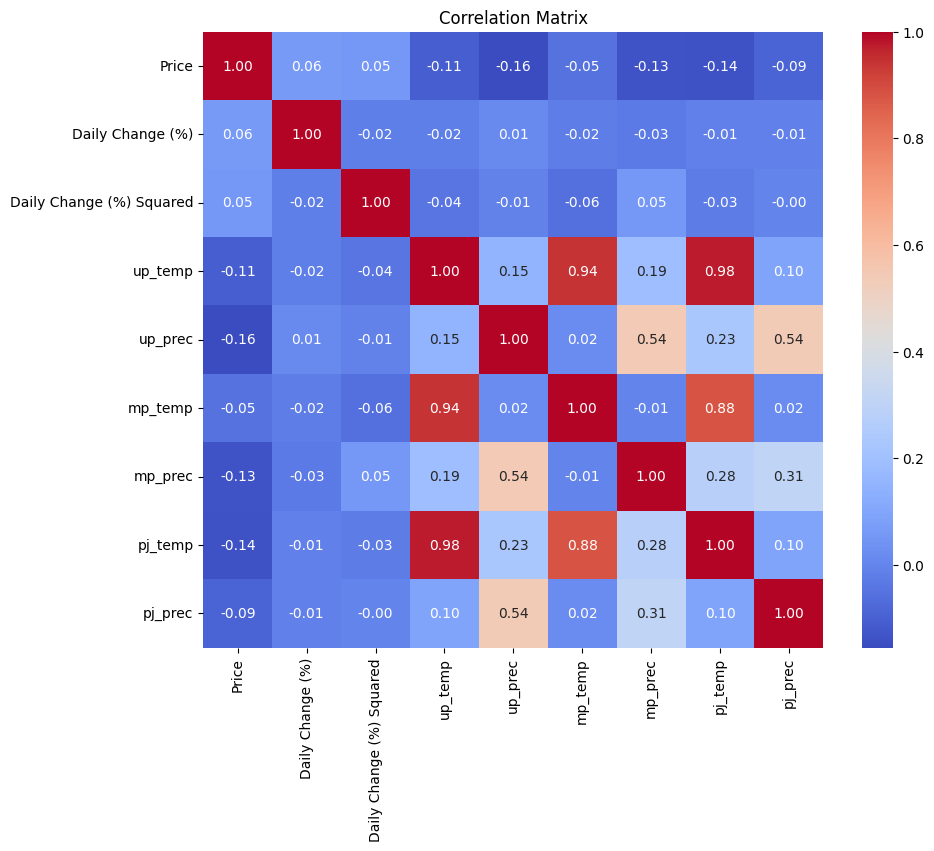

In [25]:
correlation_matrix = DAILY.drop(columns='date').corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

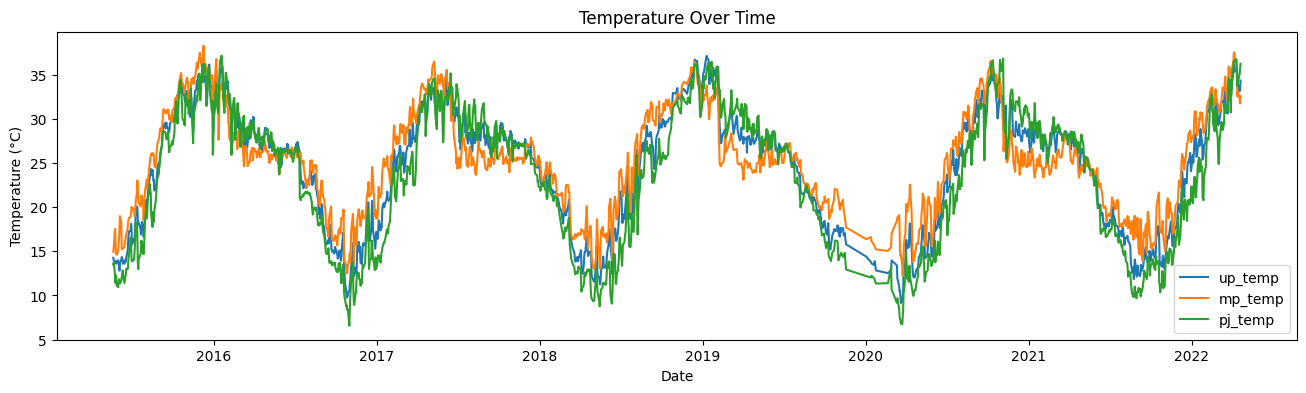

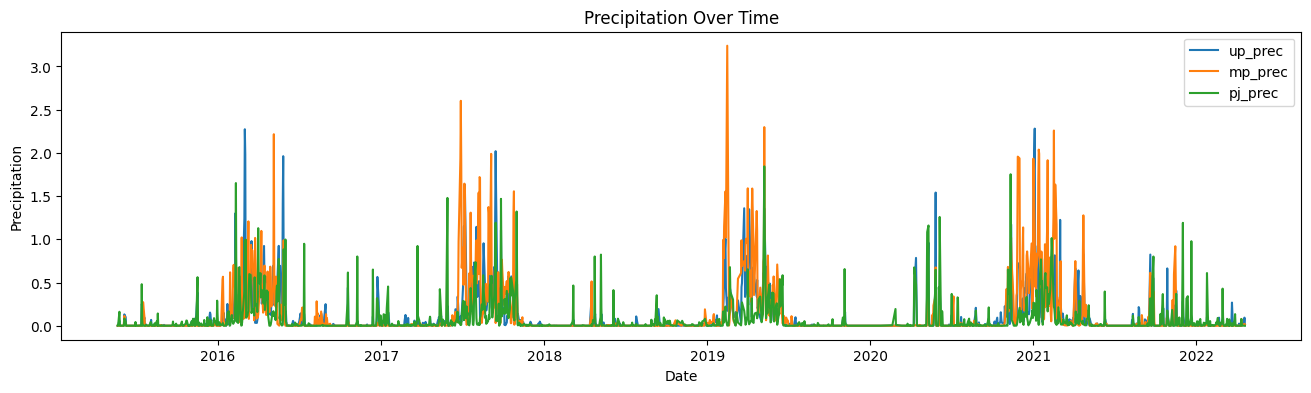

In [26]:
def weather_plots(df):
    plt.figure(figsize=(16,4))
    for col in ['up_temp', 'mp_temp', 'pj_temp']:
        plt.plot(df['date'], df[col], label=col)
        
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Over Time')
    plt.legend()
    plt.show()

    plt.figure(figsize=(16,4))
    for col in ['up_prec', 'mp_prec', 'pj_prec']:
        plt.plot(df['date'], df[col], label=col)
        
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.title('Precipitation Over Time')
    plt.legend()
    plt.show()

weather_plots(DAILY)


In [47]:
# Checking for correlation
def corr_price(df):
    for col in ['up_temp', 'up_prec', 'mp_temp', 'mp_prec', 'pj_temp', 'pj_prec']:
        corr, _ = pearsonr(df[col], df['Price'])
        print(f'Pearson correlation between {col} and Price: {corr:.2f}')

def corr_rets(df):
    for col in ['up_temp', 'up_prec', 'mp_temp', 'mp_prec', 'pj_temp', 'pj_prec']:
        corr, _ = pearsonr(df[col], df[df.columns[2]])
        print(f'Pearson correlation between {col} and Returns: {corr:.2f}')


In [33]:
print('Daily Data')
corr_price(DAILY)
print('\nWeekly Data')
corr_price(WEEKLY)
print('\nMonthly Data')
corr_price(MONTHLY)


Daily Data
Pearson correlation between up_temp and Price: -0.11
Pearson correlation between up_prec and Price: -0.16
Pearson correlation between mp_temp and Price: -0.05
Pearson correlation between mp_prec and Price: -0.13
Pearson correlation between pj_temp and Price: -0.14
Pearson correlation between pj_prec and Price: -0.09

Weekly Data
Pearson correlation between up_temp and Price: -0.15
Pearson correlation between up_prec and Price: -0.07
Pearson correlation between mp_temp and Price: -0.10
Pearson correlation between mp_prec and Price: -0.04
Pearson correlation between pj_temp and Price: -0.14
Pearson correlation between pj_prec and Price: -0.06

Monthly Data
Pearson correlation between up_temp and Price: 0.87
Pearson correlation between up_prec and Price: 0.12
Pearson correlation between mp_temp and Price: 0.88
Pearson correlation between mp_prec and Price: -0.05
Pearson correlation between pj_temp and Price: 0.89
Pearson correlation between pj_prec and Price: 0.03


In [46]:
print('Daily Data')
corr_rets(DAILY)
print('\nWeekly Data')
corr_rets(WEEKLY)
print('\nMonthly Data')
corr_rets(MONTHLY)


Daily Data
Pearson correlation between up_temp and Returns: -0.04
Pearson correlation between up_prec and Returns: -0.01
Pearson correlation between mp_temp and Returns: -0.06
Pearson correlation between mp_prec and Returns: 0.05
Pearson correlation between pj_temp and Returns: -0.03
Pearson correlation between pj_prec and Returns: -0.00

Weekly Data
Pearson correlation between up_temp and Returns: -0.00
Pearson correlation between up_prec and Returns: 0.04
Pearson correlation between mp_temp and Returns: -0.03
Pearson correlation between mp_prec and Returns: 0.06
Pearson correlation between pj_temp and Returns: 0.00
Pearson correlation between pj_prec and Returns: 0.05

Monthly Data
Pearson correlation between up_temp and Returns: -0.09
Pearson correlation between up_prec and Returns: 0.05
Pearson correlation between mp_temp and Returns: -0.07
Pearson correlation between mp_prec and Returns: -0.04
Pearson correlation between pj_temp and Returns: -0.09
Pearson correlation between pj_pr